In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/trainings/adult.csv
/kaggle/input/trainings/narendramodi_tweets.csv
/kaggle/input/trainings/employees_attrition.csv
/kaggle/input/trainings/naukri_jobs_datascience.csv
/kaggle/input/trainings/restaurant_reviews.csv
/kaggle/input/trainings/insurance.csv
/kaggle/input/trainings/odi-batting.csv
/kaggle/input/trainings/amazon_reviews_big.csv
/kaggle/input/trainings/bank-full.csv
/kaggle/input/trainings/sales_store_data.csv
/kaggle/input/trainings/IMDB Dataset.csv
/kaggle/input/trainings/sales_data.csv
/kaggle/input/trainings/Advertising.csv
/kaggle/input/trainings/Reviews/Reviews.csv


In [11]:
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

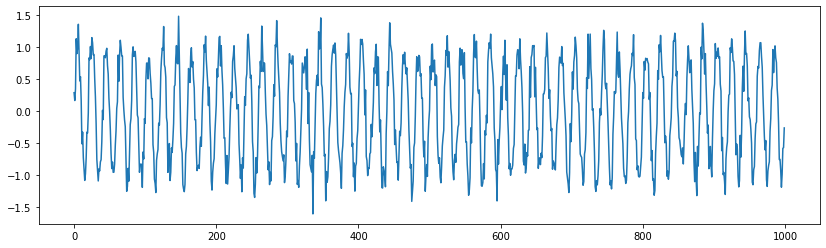

In [66]:
Fs = 100
f = 5
sample = 1000
x = np.arange(sample)
y = np.sin(2 * np.pi * f * x / Fs)
y = [i+np.random.randn()*0.2 for i in y]
plt.figure(figsize=(14,4))
plt.plot(x, y)

In [13]:
df = pd.DataFrame({'y': y})

scaler = MinMaxScaler(feature_range=(0,1))
dataset = scaler.fit_transform(df)

train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size

train = dataset[0: train_size, :]
test = dataset[train_size:len(dataset), :]
print(len(train), len(test))

700 300


In [15]:
train[:10]

array([[0.57849916],
       [0.57696955],
       [0.56201839],
       [0.63087912],
       [0.79946568],
       [0.88008161],
       [0.70067162],
       [0.74997328],
       [0.74096875],
       [0.60081361]])

In [92]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back=20
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [93]:
trainX.shape

(679, 20)

In [42]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM

In [68]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer='adam')
model.fit(trainX, trainY, epochs=50, verbose=0, batch_size=16)

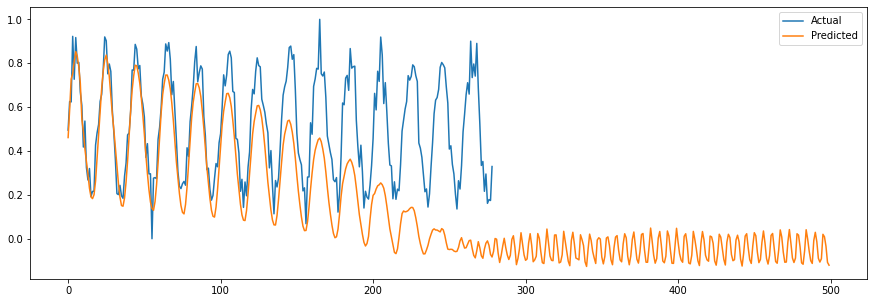

In [71]:
temp = testX[0].reshape(1, look_back)

preds = []
for i in range(500):
    pred = model.predict(temp)[0][0]
    preds.append(pred)
    temp = list(temp[0])
    temp.append(pred)
    temp = np.array([temp[1:]])
plt.figure(figsize=(15,5))
plt.plot(testY[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])

In [91]:
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1] ))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1] ))

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back), activation='tanh'))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer='adam')
model.fit(trainX, trainY, epochs=50, verbose=0, batch_size=16)

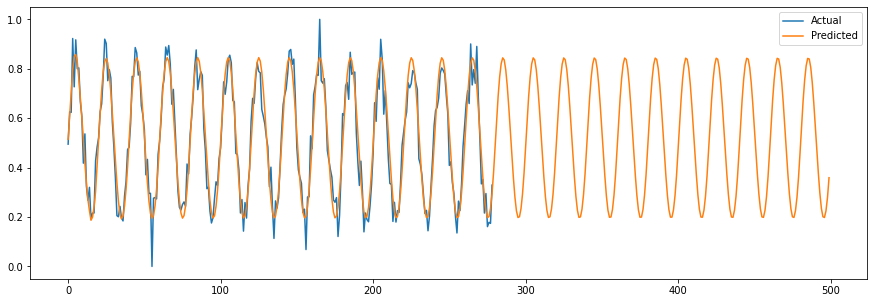

In [90]:
temp = testX[0].reshape(1,1,look_back)

preds = []
for i in range(500):
    pred = model.predict(temp)[0][0]
    preds.append(pred)
    temp = list(temp[0][0])
    temp.append(pred)
    temp = np.array([[temp[1:]]])
plt.figure(figsize=(15,5))
plt.plot(testY[:len(preds)])
plt.plot(preds)
plt.legend(['Actual', 'Predicted'])